In [24]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [5]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation: str
    finalNumber: int
    

In [7]:
def adder(state:AgentState) -> AgentState:
    '''node to add 2 numbers'''

    state["finalNumber"] = state['number1'] + state['number2']

    return state

def subtractor(state:AgentState) -> AgentState:
    '''node to subtract 2 numbers'''

    state["finalNumber"] = state['number1'] - state['number2']

    return state


def decide_next_node(state:AgentState) -> AgentState:
    '''Node to select next node of the graph'''

    if state['operation'] == '+':
        return "addition_operation"

    elif state["operation"] == '-':
        return "subtraction_operation"

        

In [8]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router", 
    decide_next_node,
    {
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

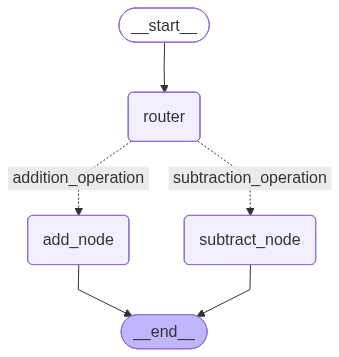

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
initial_state_1 = AgentState(number1 = 10, operation='-', number2 = 5)
print(app.invoke(initial_state_1))

{'number1': 10, 'number2': 5, 'operation': '-', 'finalNumber': 5}


In [3]:
#excercice 4
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation: str
    operation2: str
    finalNumber1: int
    finalNumber2: int
    
    def adder(state:AgentState) -> AgentState:
        '''node to add 2 numbers'''
    
        state["finalNumber"] = state["number1"] + state["number2"]
        return state
    
    def subtractor(state:AgentState) -> AgentState:
        '''node to subtract 2 numbers'''
    
        state["finalNumber"] = state['number1'] - state['number2']
    
        return state
    
    
    def decide_next_node(state:AgentState) -> AgentState:
        '''Node to select next node of the graph'''
    
        if state['operation'] == '+':
            return "addition_operation"
    
        elif state["operation"] == '-':
            return "subtraction_operation"

            
#operations for num 3 & 4
    
    def adder2(state:AgentState) -> AgentState:
        '''node to add 2 numbers'''
    
        state["finalNumber2"] = state['number3'] + state['number4']
    
        return state
    
    def subtractor2(state:AgentState) -> AgentState:
        '''node to subtract 2 numbers'''
    
        state["finalNumber2"] = state['number1'] - state['number2']
    
        return state
    
    
    def decide_next_node1(state:AgentState) -> AgentState:
        '''Node to select next node of the graph'''
    
        if state['operation2'] == '+':
            return "addition_operation2"
    
        elif state["operation2"] == '-':
            return "subtraction_operation2"
    

/Users/darkgengar/Documents/python_projects/Python-AI-Agent/myagent/lib/python3.14/site-packages/langchain_core/_api/deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [7]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state) 

graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)
graph.add_node("router2", lambda state:state) 


graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router", 
    decide_next_node,
    {
        # Edge: Node format
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)


graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")

graph.add_conditional_edges(
    "router2", 
    decide_next_node1,
    {
        # Edge: Node format
        "addition_operation2": "add_node2",
        "subtraction_operation2": "subtract_node2"
    }
)


graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

NameError: name 'adder' is not defined

In [8]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

NameError: name 'app' is not defined